In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
from sklearn.metrics import r2_score

In [2]:
# Load the autoreload extension
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
# Imported the module
from Model_CAR_NK import Model_obj_CAR_NK as obj_CAR_NK
from Model_Wt_NK import Model_obj_WT_NK as obj_WT_NK
from fitting import Model_fit,Model_Pred
from imp_exp_data import init_data, new_data, state_para, final_para

In [19]:
data_Mv411_48h = pd.read_excel('Average_CD33-CAR_Mv411.xlsx', header=2, sheet_name=1)
Specific_Mv411_48h = data_Mv411_48h.loc[7:,['Unnamed: 3','Unnamed: 5','Unnamed: 7']]
ET_ratio = ['2.5:1','1.25:1','0.62:1','0.31:1']
ET_ratio_num = np.arange(len(ET_ratio))

In [5]:
Sys_CAR_NK = obj_CAR_NK()
Sys_WT_NK = obj_WT_NK()

In [6]:
_,arr_48h = init_data(Specific_Mv411_48h.iloc[:,1])

In [7]:
LB = np.array([1.0e-1,1.0e-1,100,1.0e-1,1.0e-1,
               1.0e-2,
               1.0e-2,1.0e-2,
               1.e-6, 1.e-4])
UB = np.array([1.0,1.0,20.0e+3,1.0,1,
               1.0e+0,
               1.0e+0,1.0e+0,
               1.e-4,1.0e-2])

In [8]:
outdir = sys.argv[1]
outdir = 'test'
if not os.path.exists(outdir):
    os.makedirs(outdir)
out_file = os.path.join(outdir, 'est_par.csv')
totl_file = os.path.join(outdir, 'all_data.csv')

In [8]:
WT_NK_48h = new_data(arr_48h[0])
v5_NK_48h = new_data(arr_48h[2])
v6_NK_48h = new_data(arr_48h[3])

In [ ]:
1.054859887581662e-06, 0.005837292463577827

In [9]:
def main_Mv411():
    Tr = 46500.0
    Sys_CAR_NK.Cell_type_R_H(Targets = Tr)
    Sys_WT_NK.Cell_type_R_H(Targets = Tr)
    t = 48.0
    x0 = [0.7888891821273551, 0.33121098892941925, 105.41157151210056, 0.40651482938671624, 0.4218068622924795, 0.7472594264602304, 0.010246084197459975, 0.017657597323318026, 1.054859887581662e-06, 0.005837292463577827]
    res0 = Model_fit(x0,LB,UB,Sys_CAR_NK,Sys_WT_NK,WT_NK_48h,v5_NK_48h,v6_NK_48h,t,fit=False)
    return res0

In [10]:
res0 = main_Mv411()

final cost 821.3215589950582


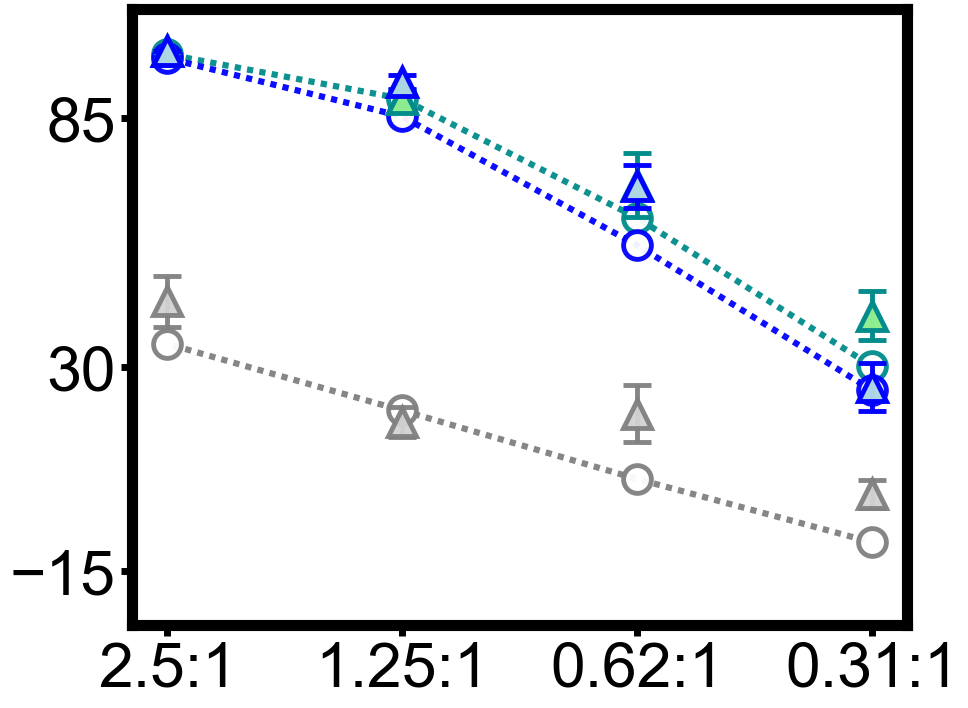

In [20]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.linewidth'] = 8
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=5)
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
m_size = 20
lw = 4.5
plt.plot(ET_ratio_num, res0[0], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='darkcyan',color = 'darkcyan',alpha=0.95,lw=lw,ls = ls[0])#,label="fit-v5")
plt.plot(ET_ratio_num, res0[1], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='blue',color = 'blue',alpha=0.95,lw=lw,ls = ls[0])#,label="fit-v6")
plt.plot(ET_ratio_num, res0[2], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='gray',color = 'gray',alpha=0.95,lw=lw,ls = ls[0])#,label="fit-WT")

plt.errorbar(ET_ratio_num, v5_NK_48h[0], yerr = v5_NK_48h[1], 
             fmt='^', markersize=m_size, markerfacecolor='lightgreen', markeredgewidth=3.5, markeredgecolor='darkcyan',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='darkcyan',alpha=0.99)#,label="data-v5")

plt.errorbar(ET_ratio_num, v6_NK_48h[0], yerr = v6_NK_48h[1], 
             fmt='^', markersize=m_size, markerfacecolor='lightblue', markeredgewidth=3.5, markeredgecolor='blue',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='blue',alpha=0.99)#,label="data-v6")

plt.errorbar(ET_ratio_num, WT_NK_48h[0], yerr = WT_NK_48h[1], 
             fmt='^', markersize=m_size, markerfacecolor='lightgray', markeredgewidth=3.5, markeredgecolor='gray',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='gray',alpha=0.95)#,label="data-WT")
t_size = 45
plt.xticks(ET_ratio_num,ET_ratio,fontname="Arial",fontsize = t_size)
plt.yticks([-15,30,85],fontname="Arial",fontsize = t_size)
plt.ylim(-27,109)
#plt.tight_layout(pad=2.5)
#plt.legend(fontsize=14, loc='upper right', labelcolor='white')
plt.savefig('Mv411_Donor1_ET_vs_AvSpecificLysis_t_48h.png')
plt.show()

In [30]:
data_Mv411_72h = pd.read_excel('Average_CD33-CAR_Mv411.xlsx', header=2, sheet_name=2)
Specific_Mv411_72h = data_Mv411_72h.loc[7:,['Unnamed: 3','Unnamed: 5','Unnamed: 7']]

In [31]:
_,arr_72h = init_data(Specific_Mv411_72h.iloc[:,1])
WT_NK_72h = new_data(arr_72h[0])
v5_NK_72h = new_data(arr_72h[2])
v6_NK_72h = new_data(arr_72h[3])

In [19]:
v5_NK_72h

(array([99.94627767, 90.73397526, 69.5634942 , 40.01936212]),
 array([0.01501416, 2.7390989 , 1.36209223, 1.38827627]))

In [32]:
LB = np.array([1.e-6, 1.e-4])
UB = np.array([1.e-4,1.0e-2])

In [21]:
res0[3]

[0.7888891821273551,
 0.33121098892941925,
 105.41157151210056,
 0.40651482938671624,
 0.4218068622924795,
 0.7472594264602304,
 0.010246084197459975,
 0.017657597323318026,
 1.054859887581662e-06,
 0.005837292463577827]

In [33]:
def main_Mv411_72h():
    Tr = 46500.0
    Sys_CAR_NK.Cell_type_R_H(Targets = Tr)
    Sys_WT_NK.Cell_type_R_H(Targets = Tr)
    t = 72.0
    x0 = [1.054859887581662e-06, 0.005837292463577827]
    y0 = res0[3]
    res1 = Model_Pred(x0,LB,UB,Sys_CAR_NK,Sys_WT_NK,WT_NK_72h,v5_NK_72h,v6_NK_72h,t,y0,fit=False)
    return res1

In [34]:
res1 = main_Mv411_72h()

final cost 442.6017213053476


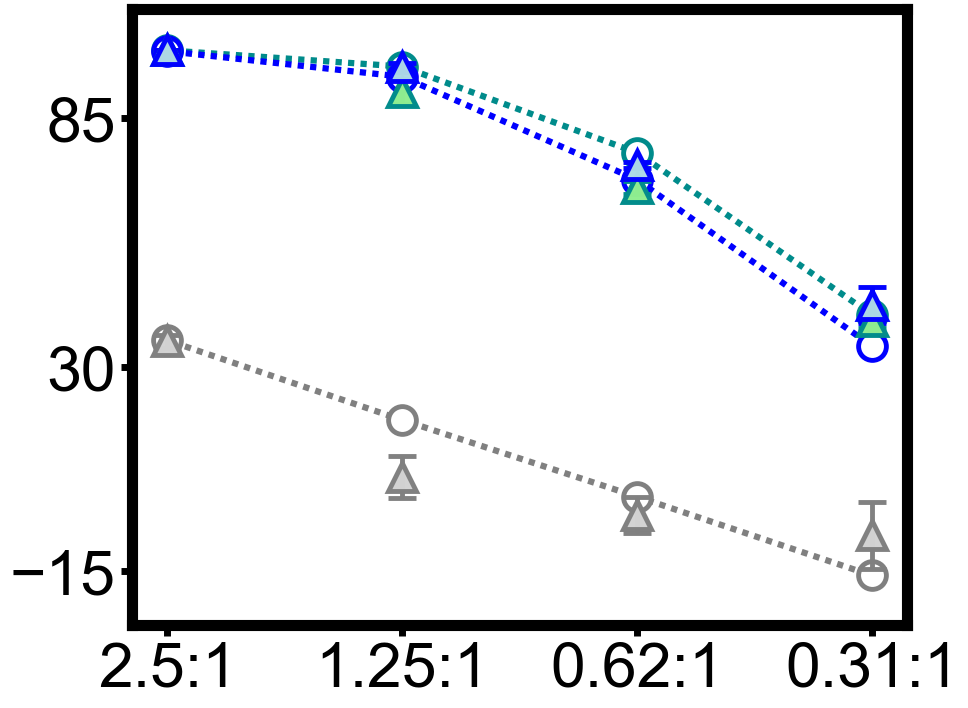

In [35]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.linewidth'] = 8
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=5)
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
m_size = 20
lw = 4.5
plt.plot(ET_ratio_num, res1[0], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='darkcyan',color = 'darkcyan',lw=lw,ls = ls[0])#,label="pred-v5")
plt.plot(ET_ratio_num, res1[1], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='blue',color = 'blue',lw=lw,ls = ls[0])#,label="pred-v6")
plt.plot(ET_ratio_num, res1[2], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='gray',color = 'gray',lw=lw,ls = ls[0])#,label="fit-WT")
plt.errorbar(ET_ratio_num, v5_NK_72h[0], yerr = v5_NK_72h[1], 
             fmt='^', markersize=m_size, markerfacecolor='lightgreen', markeredgewidth=3.5, markeredgecolor='darkcyan',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='darkcyan',alpha=0.99)#,label="data-v5")
plt.errorbar(ET_ratio_num, v6_NK_72h[0], yerr = v6_NK_72h[1], 
             fmt='^', markersize=m_size, markerfacecolor='lightblue', markeredgewidth=3.5, markeredgecolor='blue',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='blue',alpha=0.99)#,label="data-v6")
plt.errorbar(ET_ratio_num, WT_NK_72h[0], yerr = WT_NK_72h[1], 
             fmt='^', markersize=m_size, markerfacecolor='lightgray', markeredgewidth=3.5, markeredgecolor='gray',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='gray',alpha=0.99)#,label="data-WT")
t_size = 45
plt.xticks(ET_ratio_num,ET_ratio,fontname="Arial",fontsize = t_size)
plt.yticks([-15,30,85],fontname="Arial",fontsize = t_size)
plt.ylim(-27,109)
#plt.tight_layout(pad=2.5)
#plt.legend(bbox_to_anchor=(1.05, 1))
#plt.legend(fontsize=17, loc='upper right', labelcolor='white')
plt.savefig('Mv411_Donor1_ET_vs_AvSpecificLysis_t_72h.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


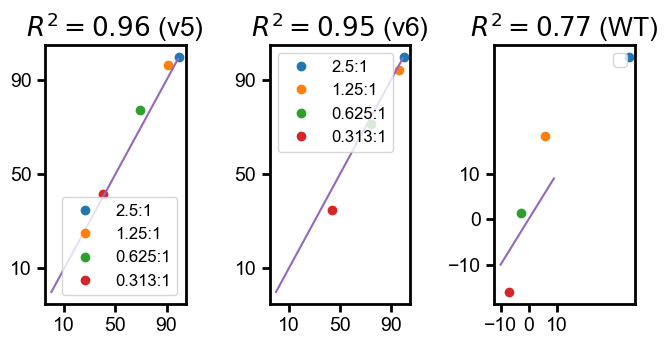

In [24]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['font.size'] = 25
plt.rcParams['font.family'] = 'Arial'
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (7,4))

for i in range(len(res1[0])):
    ax1.plot(v5_NK_72h[0][i], res1[0][i], 'o', label=f'{ET_ratio[i]}')
    ax2.plot(v6_NK_72h[0][i], res1[1][i], 'o', label=f'{ET_ratio[i]}')
    ax3.plot(WT_NK_72h[0][i], res1[2][i], 'o')

ax1.plot(np.arange(0,100),np.arange(0,100))
#ax1.set_xlabel('Data')
#ax1.set_ylabel('Prediction',fontsize =23)
ax1.set_xticks([10,50,90])
ax1.set_yticks([10,50,90])
ax1.set_title(f'$R^2 = {r2_score(v5_NK_72h[0], res1[0]):.2f}$ (v5)',fontsize =19)
ax1.tick_params(axis='both', which='major', labelsize=14, length=6,width=2)
ax1.legend(prop = {'size':12})

ax2.plot(np.arange(0,100),np.arange(0,100))
#ax2.set_xlabel('Data')
#ax2.set_ylabel('Prediction',fontsize =25)
ax2.set_xticks([10,50,90])
ax2.set_yticks([10,50,90])
ax2.set_title(f'$R^2 = {r2_score(v6_NK_72h[0], res1[1]):.2f}$ (v6)',fontsize =19)
ax2.tick_params(axis='both', which='major', labelsize=14, length=6,width=2)
ax2.legend(prop = {'size':12})


ax3.plot(np.arange(-10,10),np.arange(-10,10))
#ax1.set_xlabel('Data')
#ax1.set_ylabel('Prediction',fontsize =23)
ax3.set_xticks([-10,0,10])
ax3.set_yticks([-10,0,10])
ax3.set_title(f'$R^2 = {r2_score(WT_NK_72h[0], res1[2]):.2f}$ (WT)',fontsize =19)
ax3.tick_params(axis='both', which='major', labelsize=14, length=6,width=2)
ax3.legend(prop = {'size':12})
#plt.xlabel('x')
plt.tight_layout()
plt.savefig('R2_CAN_NK_Pred.png')
plt.show()